In [1]:
#Function Definitions
#
from qiskit import *
#
def inv_qft(circuit_name):
    circuit_name.barrier([0,1,2,3,4])
    circuit_name.h(3)
    circuit_name.cp(pi/2, 3, 2)
    circuit_name.cp(pi/4, 3, 1)
    circuit_name.cp(pi/8, 3, 0)
    circuit_name.h(2)
    circuit_name.cp(pi/2, 2, 1)
    circuit_name.cp(pi/4,2,0)
    circuit_name.h(1)
    circuit_name.cp(pi/2, 0, 1)
    circuit_name.h(0)
    circuit_name.swap(1,2)
    circuit_name.swap(0,3)


In [9]:
factor1 = 0
factor2 = 0
while(factor1 == 0 & factor2 == 0):
    ############CLASSICAL_IMPLEMENTATION######################
    from math import *
    from random import randint
    N = 21
    factor1 = 0
    factor2 = 0
    #Step 1, pick a, a random number between 1 and N (exclusive)
    #a = randint(2,N-1) #a is set to a random number between 2 and 20 (inclusive)
    a=4 #for testing purposes 
    print("N is", N, "and a is", a)
    #Step 2, compute the greatest common divisor of a and N
    k = gcd(a, N)
    print("k, the greatest common divisor, is", k)
    #Step 3, could be done if k is not equal to one
    if k != 1:
        factor1 = k
        factor2 = int(N/k)
        print("The factors of", N, "are", factor1, "and", factor2)
        break
    else:
        print("Factors of", N, "are still unknown, Quantum Period Finding subroutine required to find factors")
        ###########QUANTUM_COMPUTER_IMPLEMENTATION#################
        import numpy as np
        #Step 4, run the QPF subroutine and find r, the period of a^x mod N
        r = 0 #r = period
        control = QuantumRegister(3, 'control_register')
        work = QuantumRegister(2, 'work_register')
        classical_r = ClassicalRegister(4, 'c')
        circuit = QuantumCircuit(control, work, classical_r)
        # Initialization, putting all quantum register qubits into superposition
        circuit.h([0,1,2,])
        circuit.x(4)
        #MPF
        if a == 4:
            circuit.cx(2,4)
            circuit.cx(1,4)
            circuit.cx(4,3)
            circuit.ccx(1,3,4)
            circuit.cx(4,3)
            circuit.x(4)
            circuit.ccx(0,4,3)
            circuit.x(4)
            circuit.cx(4,3)
            circuit.ccx(0,3,4)
            circuit.cx(4,3)
        #Inverse QFT
        inv_qft(circuit)
        circuit.measure([0,1,2], [0,1,2])
        print(circuit.draw(fold = 100))
        #
        # Use Aer's qasm_simulator
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = backend_sim.run(transpile(circuit, backend_sim), shots=1024)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(circuit)
        print("Counts:", counts)
        plot_histogram(counts)
        r = 6
        #break #for when I am experimenting with values
        ###################Back to Classical Implementation###########################
        #Step 5, if r is odd, go back to step 1
        if r == 0:
             print("There was an issue with the code")
        #elif r % 2 == 0:
            #continue
        #Step 6, if a^(r/2) = -1modN, go back to step 1
        #elif a^(r/2) == -1 % N:
            #continue
        #Step 7, perform gcd(a^(r/2)+-1, N)
        else:
            power = pow(a,r/2)
            power = int(power)
            #print(power)
            value1 = gcd(N, power + 1)
            value2 = gcd(N, power - 1)
            print(value1, value2)
            if int(value1) != 1:
                factor1 = value1
                factor2 = N / factor1
            elif int(value2) != 1:
                factor2 = value2
                factor1 = N / factor2
            print("The factors of", N, "are", int(factor1), "and", int(factor2))
            break
        break

N is 21 and a is 4
k, the greatest common divisor, is 1
Factors of 21 are still unknown, Quantum Period Finding subroutine required to find factors
                    ┌───┐                                                        ░               »
control_register_0: ┤ H ├────────────────────────────────■──────────────■────────░───────────────»
                    ├───┤                                │              │        ░               »
control_register_1: ┤ H ├───────■─────────■──────────────┼──────────────┼────────░───────────────»
                    ├───┤       │         │              │              │        ░               »
control_register_2: ┤ H ├──■────┼─────────┼──────────────┼──────────────┼────────░───────■───────»
                    └───┘  │    │  ┌───┐  │  ┌───┐     ┌─┴─┐     ┌───┐  │  ┌───┐ ░ ┌───┐ │P(π/2) »
   work_register_0: ───────┼────┼──┤ X ├──■──┤ X ├─────┤ X ├─────┤ X ├──■──┤ X ├─░─┤ H ├─■───────»
                    ┌───┐┌─┴─┐┌─┴─┐└─┬─┘┌─┴─┐└─┬─┘┌───┐└─┬─┘

In [10]:
#test the inverse qft
#qc = QuantumCircuit(4)
#inv_qft(qc)
#qc.draw(output = 'mpl')

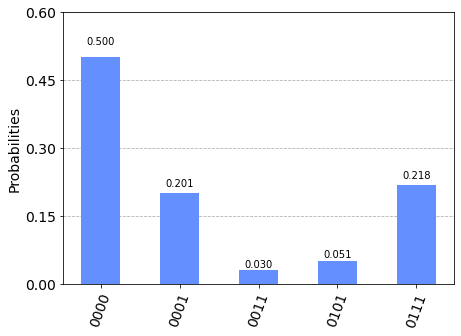

In [7]:
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts())